# Lab 4 - Modeling flight delays

A lab done by both:

Kaden Franklin & Ted Bjurlin

From department of transportation

https://hendrix-cs.github.io/csci285/labs/flights.html

In [13]:
# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import seaborn
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Import SciKitLearn functions
from sklearn.datasets import make_blobs, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Apply the default theme
sns.set_theme()

from tqdm import trange
#progress bar for long running cells

# Step 1: Loading flights

We can retrieve our dataset from:

https://www.kaggle.com/datasets/usdot/flight-delays

https://www.kaggle.com/datasets/hendrixwilsonj/flights-transformed

https://nbviewer.org/github/Hendrix-CS/csci285/blob/master/assets/notebooks/Flight_Delays_And_Cancellations.ipynb?flush_cache=true

In [2]:
air = pd.read_csv("airlines.csv")

air.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [12]:
# Load the transformed data into a data frame called “flights” and familarize yourself with the size and quality of the dataset.

#notably the file is 700+ mb so it will not work inside a git repository, I have chosen to place it in another directory.

flights = pd.read_csv(r"C:\Users\kaden\Documents\files that are too big\flights-transformed.csv")

flights.head()

C:\Users\kaden\AppData\Local\Temp\ipykernel_6064\3203049405.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(r"C:\Users\kaden\Documents\files that are too big\flights-transformed.csv")


,airline,origin_airport,destination_airport,scheduled_time,elapsed_time,scheduled_departure,departure_delay,arrival_delay
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,205.0,194.0,2015-01-01 00:05:00,-11.0,-22.0
1,American Airlines Inc.,Los Angeles International Airport,Palm Beach International Airport,280.0,279.0,2015-01-01 00:10:00,-8.0,-9.0
2,US Airways Inc.,San Francisco International Airport,Charlotte Douglas International Airport,286.0,293.0,2015-01-01 00:20:00,-2.0,5.0
3,American Airlines Inc.,Los Angeles International Airport,Miami International Airport,285.0,281.0,2015-01-01 00:20:00,-5.0,-9.0
4,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,235.0,215.0,2015-01-01 00:25:00,-1.0,-21.0


In [4]:
print(f"Number of Rows: {len(flights)}")
print(f"Shape (rows x cols): {flights.shape}")

Number of Rows: 5714008
Shape (rows x cols): (5714008, 8)


In [5]:
flights.describe()

,scheduled_time,elapsed_time,departure_delay,arrival_delay
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,1.418940e+02,1.370062e+02,9.294842e+00,4.407057e+00
std,7.531400e+01,7.421107e+01,3.688972e+01,3.927130e+01
min,1.800000e+01,1.400000e+01,-8.200000e+01,-8.700000e+01
25%,8.500000e+01,8.200000e+01,-5.000000e+00,-1.300000e+01
50%,1.230000e+02,1.180000e+02,-2.000000e+00,-5.000000e+00
75%,1.740000e+02,1.680000e+02,7.000000e+00,8.000000e+00
max,7.180000e+02,7.660000e+02,1.988000e+03,1.971000e+03


In [6]:
flights.value_counts(dropna=False)

airline                 origin_airport                                    destination_airport                         scheduled_time  elapsed_time  scheduled_departure  departure_delay  arrival_delay
Southwest Airlines Co.  NaN                                               NaN                                         120.0           106.0         2015-10-06 07:35:00  -5.0             -19.0            2
Delta Air Lines Inc.    NaN                                               NaN                                         166.0           142.0         2015-10-05 10:59:00  -2.0             -26.0            2
Southwest Airlines Co.  NaN                                               NaN                                         90.0            83.0          2015-10-07 06:00:00  -4.0             -11.0            2
                                                                                                                      80.0            75.0          2015-10-14 11:15:00  -2.0            

In [7]:
flights = flights.dropna(subset = flights.columns)

In [8]:
flights.value_counts(dropna=False)

airline                 origin_airport                                    destination_airport                          scheduled_time  elapsed_time  scheduled_departure  departure_delay  arrival_delay
Alaska Airlines Inc.    Adak Airport                                      Ted Stevens Anchorage International Airport  161.0           153.0         2015-09-03 18:00:00   61.0             53.0            1
Southwest Airlines Co.  Cleveland Hopkins International Airport           Baltimore-Washington International Airport   75.0            60.0          2015-03-16 13:40:00   5.0             -10.0            1
                                                                                                                                       61.0          2015-01-05 11:05:00   51.0             37.0            1
                                                                                                                                                     2015-01-03 13:45:00  -3.0       

In [9]:
# Convert scheduled_departure to a datetime (this column loads as a string)
    
flights['scheduled_departure'] = pd.to_datetime(flights['scheduled_departure'])

In [10]:
flights.head()

,airline,origin_airport,destination_airport,scheduled_time,elapsed_time,scheduled_departure,departure_delay,arrival_delay
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport,205.0,194.0,2015-01-01 00:05:00,-11.0,-22.0
1,American Airlines Inc.,Los Angeles International Airport,Palm Beach International Airport,280.0,279.0,2015-01-01 00:10:00,-8.0,-9.0
2,US Airways Inc.,San Francisco International Airport,Charlotte Douglas International Airport,286.0,293.0,2015-01-01 00:20:00,-2.0,5.0
3,American Airlines Inc.,Los Angeles International Airport,Miami International Airport,285.0,281.0,2015-01-01 00:20:00,-5.0,-9.0
4,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport,235.0,215.0,2015-01-01 00:25:00,-1.0,-21.0


In [11]:
flights.dtypes
# Write a data dictionary which explains each column’s dtype and meaning.

airline                        object
origin_airport                 object
destination_airport            object
scheduled_time                float64
elapsed_time                  float64
scheduled_departure    datetime64[ns]
departure_delay               float64
arrival_delay                 float64
dtype: object

## Data Dictionary which explains each column’s dtype and meaning

|Feature | DataType | Description|
|:--------|:----------|:------------|
|airline | object | Name of airline|
|origin_airport | object | Airport the flight will take off from|
|destination_airport | object | Airport the flight will land at|
|scheduled_time | float64 | Number describing the scheduled takeoff time |
|elapsed_time | float64 | Number describing the total flight time|
|scheduled_departure | datetime64[ns] | The flight's scheduled takeoff time (*readable*)|
|departure_delay | float64 | Number describing the flight's delay at takeoff|
|arrival_delay | float64 | Number describing the flights delay upon arrival|


# Step 2: Aggregating & Plotting Delay

Let’s start by performing some general analysis about delays. From Flight Delays And Cancellations, we learned that most airlines report delays close to zero but all experience large outliers.

Using two bar charts aggregated by airline, plot mean departure_delay and mean arrival_delay. 

Make sure to label your charts, size the figure correctly, and set a title.

In [98]:
new_df = flights.groupby(['airline'], as_index=False).mean(numeric_only=True)

new_df

,airline,scheduled_time,elapsed_time,departure_delay,arrival_delay
0,Alaska Airlines Inc.,181.980385,179.296940,1.892036,-0.791409
1,American Airlines Inc.,172.527060,167.208246,9.254027,3.935214
2,American Eagle Airlines Inc.,96.210442,93.003753,10.523229,7.316540
3,Atlantic Southeast Airlines,99.278895,97.272090,8.971355,6.964550
4,Delta Air Lines Inc.,147.848780,140.822148,7.706897,0.680265
5,Frontier Airlines Inc.,155.737870,155.249765,14.217548,13.729468
6,Hawaiian Airlines Inc.,101.115620,102.780620,0.496856,2.161856
7,JetBlue Airways,173.003866,168.199839,11.753367,6.949339
8,Skywest Airlines Inc.,102.620149,100.729380,8.112207,6.221438
9,Southwest Airlines Co.,127.479958,121.389724,10.928065,4.837831


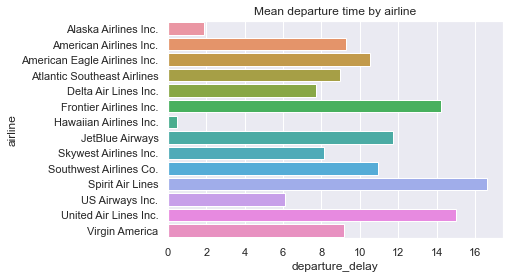

In [99]:
bar = sns.barplot(
    data=new_df, 
    x="departure_delay", 
    y="airline"
).set(
    title="Mean departure time by airline"
)

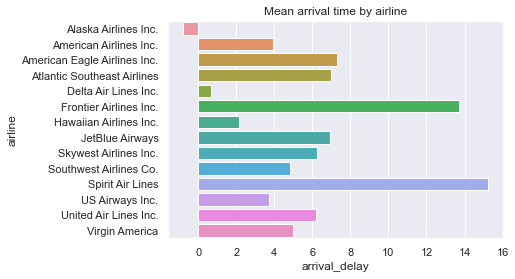

In [100]:
bar = sns.barplot(
    data=new_df, 
    x="arrival_delay", 
    y="airline"
).set(
    title="Mean arrival time by airline"
)

Feature Selection: Restrict columns to just the three mentioned above.

Aggregation: You’ll need to aggregate the data (i.e. mean delays) after feature selection. 

Once aggregation is done, its common to reset the index in order to make the data easier to plot.

In [101]:
newer_df = flights[['airline', 'departure_delay', 'arrival_delay']].groupby(['airline'], as_index=False).mean(numeric_only=True)

In [102]:
newer_df

,airline,departure_delay,arrival_delay
0,Alaska Airlines Inc.,1.892036,-0.791409
1,American Airlines Inc.,9.254027,3.935214
2,American Eagle Airlines Inc.,10.523229,7.316540
3,Atlantic Southeast Airlines,8.971355,6.964550
4,Delta Air Lines Inc.,7.706897,0.680265
5,Frontier Airlines Inc.,14.217548,13.729468
6,Hawaiian Airlines Inc.,0.496856,2.161856
7,JetBlue Airways,11.753367,6.949339
8,Skywest Airlines Inc.,8.112207,6.221438
9,Southwest Airlines Co.,10.928065,4.837831


In [103]:
newer_df = newer_df.dropna(subset = newer_df.columns).reset_index()

Discussion

Examine the charts you just produced. Which airlines are outliers for departure_delay? 



Which airlines are outliers for arrival_delay? 

Alaskan airlines


Find the mean departure_delay and arrival_delay across all airlines excluding any outliers.

# Step 3: Departure Delay

Now we define some functions needed for later use

In [104]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [105]:
from matplotlib.colors import LinearSegmentedColormap


def plot_heatmap_discrete_legend(data):
    
    # Set the width and height of the figure
    plt.figure(figsize=(20,100))
    
    # Add title
    plt.title("Average Departure Delay (Airline vs. Origin Airport)")
    
    # calc discrete values
    value_to_int = {j:i for i,j in enumerate(pd.unique(data.values.ravel()))}
    n = len(value_to_int)   

    # discrete colormap (n samples from a given cmap)
    cmap = sns.color_palette("Paired", n) 
    ax = sns.heatmap(
        data=data.replace(value_to_int), 
        cmap=cmap,
        linewidths=0.5,
        linecolor='lightgray'
    ) 

    # modify colorbar
    colorbar = ax.collections[0].colorbar 
    r = colorbar.vmax - colorbar.vmin 
    colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
    colorbar.set_ticklabels(list(value_to_int.keys()))                                          
    
    # show plot
    plt.show()

In Step 2, you showed that mean departure_delay is larger than mean arrival_delay

For the rest of this lab, we will continue to model departure_delay, 

but ignore arrival_delay since it may be impacted by variables outside the flights dataset (e.g. flight speed).

In [ ]:
# idk what im doin

# look here:
# https://nbviewer.org/github/Hendrix-CS/csci285/blob/master/assets/notebooks/Flight_Delays_And_Cancellations.ipynb?flush_cache=true

# this as reference by bonus
# https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial


Origin Airport vs. Airline

Let’s see if the origin_airport has an impact on departure_delay by plotting a heatmap of airline vs. origin_airport. 

The color should correspond to delay_level, which we will define in a bit.

In [ ]:
heat = sns.heatmap(
    data=h, 
    annot=True,
    cmap="coolwarm"
)

Feature Selection: 

Start by creating a dataframe that has the three columns mentioned above.

Aggregation: 

Group the dataframe by origin_airport and airline and calculate mean departure_delay.

The resulting dataframe should have a shape of (1304, 1). origin_airport and airline should make up a MultiIndex.

Augmentation:

Create a new feature called delay_level.

Values in this column should be one of “on time” (if delay is less than 5 minutes), “small delay” (if delay is less than 45 minutes) or “long delay”.

Reshaping:

Select just the delay_level series from the grouped dataframe and call .unstack() to shape the series back into a dataframe that has origin_airport as its index and all of the airlines as columns. 

The final shape should be (322, 14). The values of this heatmap should be the delay_level categories you just defined.

Plotting:

Finally, use the provided plot_heatmap_discrete_legend() function to visualize this dataset. 

This function’s purpose is mostly to discretize the delay_level color pallete and legend. 

You should be able to pass the unstacked data frame that has a shape of (322, 14) to this function as a parameter.

After dropping nan values we should convert numerical value into a matrix

In [ ]:
x = c_t.loc [:, columns].values
x

In [ ]:
scalar = StandardScaler()

x = scalar.fit_transform(x)
x

In [ ]:
kmeans = KMeans(n_clusters=2)
result = kmeans.fit(x)

In [ ]:
result.cluster_centers_

In [ ]:
result.labels_

In [ ]:
result.cluster_centers_

In [ ]:
c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels']] = scalar.fit_transform(c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels']])

y = kmeans.fit_predict(c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels']])

c_t['clusters'] = y

c_t.head()

Discussion:

Compare the output from using plot_heatmap_discrete_legend() vs. a vanilla call to sns.heatmap. 

What’s the value of discretizing the color pallete and legend?

Discuss whether origin_airport has an impact on departure_delay. 

Are some airports more prone to delays than others? Or is origin_airport not an important feature when modeling flight delays?

# Step 4: Temporal Analysis (Bonus)
+  +15 points on exam 1

In Steps 2 & 3, you did an analysis of how airline and origin_airport affect departure_delay.

We also narrowed our view to just modeling departure_delay.

Let’s start modeling delays now by looking at scheduled_departure more closely for a given airline and origin_airport.

There is so much data to parse that in order to visualize its temporal nature we need to restrict our view to a smaller time range.

Feature Selection:

Start by restricting, re-naming, and re-ordering your dataset’s features to the following columns:

(airline, airport, time, delay).

Here “airport” means origin_airport, “time” means scheduled_departure and “delay” means departure_delay.

Aggregation: 

You’ll need to aggregate the data (i.e. mean delay) after feature selection.

It is possible for multiple rows to match (airline, airport, time) because destination airport has been dropped 

(i.e. multiple flights can leave at the same time going to different destinations). 

Check for duplicates before and after aggregating to ensure this was done correctly.

For how to chain pandas conditionals together:

https://chrisalbon.com/code/python/data_wrangling/pandas_selecting_rows_on_conditions/



delaythreshold = 60 * 12 # delayed less than a day. 

time_range = f['time'] < datetime.datetime(2015, 1, 15)
delay_cap = f['delay'] < delaythreshold
airline = f['airline'] == "American Airlines Inc."
airport = f['airport'] == "Dallas/Fort Worth International Airport"
I deliberately chose an airline and airport that I knew would have lots of data to work with - AA is headquartered in Dallas, so there are a large number of daily flights. Make sure to drop any NaN values from the final dataframe.


Plot time vs. delay

Create two line charts. The first line chart should show data ranging from 2015-01-01 to 2015-01-14. For the second, choose only two or three days of data to display. Make sure to label your axes and set a title. Size the figure appropriately. Set aspect=3.0.

Model time of day
Now we want to zero in on time and delay across all airlines and for all of 2015. Reduce the dataset again to just two columns: time and delay. Make sure to to clear any filters, such as airline/airport, that were previously applied. This plot should cover the full 2015 dataset for all airlines.

Convert the time column to just be “seconds since the start of the day”. You can either make a new column, or replace the existing time column with this new series. Create a scatter plot and regression line using lmplot.

Aggregate data and drop any NaN values.
Label your axes and set a title.
Size the figure appropriately. Set aspect=3.0.
Color the reg line by passing line_kws={'color': 'red'} as an argument to .lmplot().
Pass as an argument order=3 to fit a polynomial of 3 terms intead of linear.



Discussion
For each plot, what patterns in the data do you observe? What explains these patterns?

In [ ]:
c_t.groupby(['heart_disease',  'clusters']).size()

In [ ]:
def apply_pred(x):
    m = [True, False]
    return m[x]

In [ ]:
c_t['prediction'] = c_t['clusters'].apply(apply_pred)

In [ ]:
ground_tr = c_t['heart_disease'].values
pred_val = c_t['prediction'].values
y_axis = c_t['heart_disease'].unique()

In [ ]:
new_data = confusion_matrix(ground_tr, pred_val, labels = y_axis)
new_data

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))



heatmap = sns.heatmap(
    pd.DataFrame(new_data, columns=y_axis, index=y_axis),
    annot=True,
    fmt="d",
    annot_kws={"size":13},
    cmap="Spectral"
)

The outcome of running K-Means on this dataset can be explained in a few expressions of variables.

The variables extrapolated are shown in the graph about and the chart below.


113 True Negatives - These patients do not have heart disease and were predicted correctly

35 False Negatives - These patients have heart disease and were predicted incorrectly

46 False Positives - These patients do not have heart disease and were predicted incorrectly

99 True Positives - These patients have heart disease and were predicted correctly





In [ ]:
c_t.groupby(['heart_disease', 'prediction']).size()

In [ ]:
c_t.sort_values(['heart_disease'])[['heart_disease', 'clusters']]

# Step 5: Choropleths (Bonus)
+ +1 late day


In airlines.csv there are geographical features that can be used to make choropleths. 

Overlay airline location on top of any choropleth of your choosing. You may need to use kaggle to load the necessary geopandas libraries.

Please turn in step 5 in a separate notebook from Steps 1-4.


In [ ]:
pca = PCA(n_components=2).fit(x)

In [ ]:
pca.explained_variance_

In [ ]:
x

In [ ]:
pca.transform(x)

In [ ]:
pca = PCA(
    n_components=2
)

principal_components = pca.fit_transform(x)

In [ ]:
pcadf = pd.DataFrame(data= principal_components,
                       columns=["PCA 1", "PCA 2"])

pcadf['clusters'] = c_t['clusters']
pcadf['prediction'] = c_t['prediction']

In [ ]:
scatter = sns.relplot(
    data=pcadf, 
    x="PCA 1", 
    y="PCA 2", 
    kind="scatter",
    height=10,
    aspect=1.5, 
    hue="clusters",
    style="prediction",
).set(
    title="Heart disease vs. Cluster"
)